In [1]:
import os
cwd_old = os.getcwd()
os.chdir('..')
cwd_new = os.getcwd()
print("The working directory is moved from {} to {}.".format(cwd_old, cwd_new))

The working directory is moved from /data2/sungjaecho/Projects/tacotron2/dev_ipynb to /data2/sungjaecho/Projects/tacotron2.


# 1. Finding a Scale of the Maximum STD

## 1.1. Importing Modules and the Gaussian PDF

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
plt.rcParams['axes.facecolor'] = 'white'

In [3]:
from torch.distributions.normal import Normal

In [4]:
def normal_pdf(x, mean, std):
    p = Normal(mean, std).cdf(x+0.5) - Normal(mean, std).cdf(x-0.5)
    p = p / p.sum()
    return p    

## 1.2. Plotting Maxiumn Probability by STD

### 1.2.1. Long STD range

In [5]:
min_std = 0.001
max_std = 400

In [6]:
txt_length = 80
mean = txt_length // 2
x = torch.Tensor(range(0,txt_length)) # x: Independent variable

std_step = 0.001
std_array = np.arange(min_std, max_std+std_step, std_step)
max_values = np.empty_like(std_array)
for i in tqdm(range(std_array.shape[0])):
    std = std_array[i]
    p = normal_pdf(x, mean, std)
    max_value = p.max().item()
    max_values[i] = max_value

100%|██████████| 400000/400000 [01:25<00:00, 4680.38it/s]


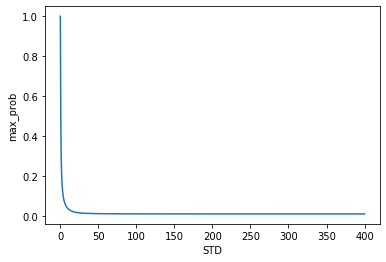

In [7]:
plt.xlabel("STD")
plt.ylabel("max_prob")
plt.plot(std_array, max_values)
plt.show()

### 1.2.2. `max_std=50` Range

In [8]:
min_std = 0.001
max_std = 50

In [9]:
txt_length = 80
mean = txt_length // 2
x = torch.Tensor(range(0,txt_length)) # x: Independent variable

std_step = 0.001
std_array = np.arange(min_std, max_std+std_step, std_step)
max_values = np.empty_like(std_array)
for i in tqdm(range(std_array.shape[0])):
    std = std_array[i]
    p = normal_pdf(x, mean, std)
    max_value = p.max().item()
    max_values[i] = max_value

100%|██████████| 50000/50000 [00:09<00:00, 5374.76it/s]


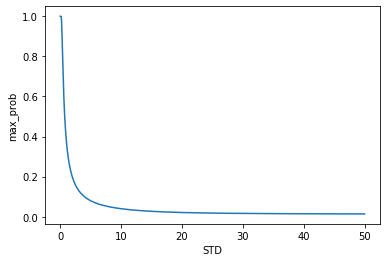

In [10]:
plt.xlabel("STD")
plt.ylabel("max_prob")
plt.plot(std_array, max_values)
plt.show()

### 1.2.3. From Only One `p=1` STD To All same `p`

In [32]:
#min_std = 0.143
#max_std = 36.770
min_std = 0.1
max_std = 100

In [33]:
txt_length = 80
mean = txt_length // 2
x = torch.Tensor(range(0,txt_length)) # x: Independent variable

std_step = 0.001
std_array = np.arange(min_std, max_std+std_step, std_step)
max_values = np.empty_like(std_array)
for i in tqdm(range(std_array.shape[0])):
    std = std_array[i]
    p = normal_pdf(x, mean, std)
    max_value = p.max().item()
    max_values[i] = max_value

100%|██████████| 99902/99902 [00:18<00:00, 5362.40it/s]


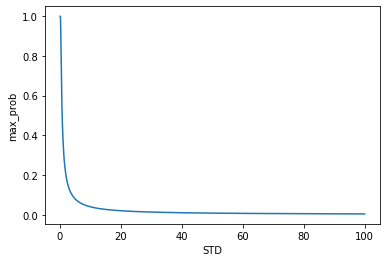

In [34]:
plt.xlabel("STD")
plt.ylabel("max_prob")
plt.plot(std_array, max_values)
plt.show()

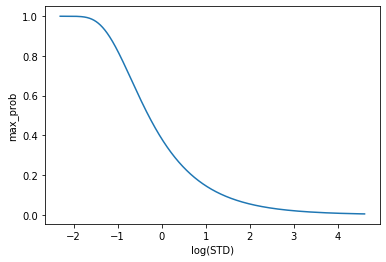

In [35]:
plt.xlabel("log(STD)")
plt.ylabel("max_prob")
plt.plot(np.log(std_array), max_values)
plt.show()

## 1.3. Tansform `(x,y) = (STD, max_prob)` are linear relationship

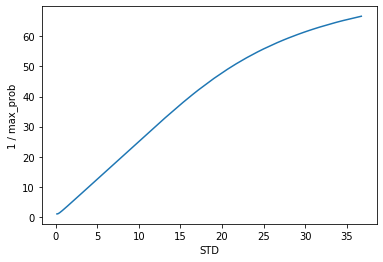

In [15]:
plt.xlabel("STD")
plt.ylabel("1 / max_prob")
plt.plot(std_array, 1 / max_values)
plt.show()

In [16]:
def normal_pdf(x, mean, std):
    p = Normal(mean, std).cdf(x+0.5) - Normal(mean, std).cdf(x-0.5)
    #p = p / p.sum()
    return p    

In [17]:
min_std = 0.143
max_std = 36.770

In [18]:
txt_length = 80
mean = txt_length // 2
x = torch.Tensor(range(0,txt_length)) # x: Independent variable

std_step = 0.001
std_array = np.arange(min_std, max_std+std_step, std_step)
max_values = np.empty_like(std_array)
for i in tqdm(range(std_array.shape[0])):
    std = std_array[i]
    p = normal_pdf(x, mean, std)
    max_value = p.max().item()
    max_values[i] = max_value

100%|██████████| 36628/36628 [00:07<00:00, 4840.73it/s]


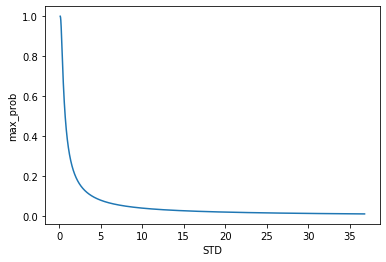

In [19]:
plt.xlabel("STD")
plt.ylabel("max_prob")
plt.plot(std_array, max_values)
plt.show()

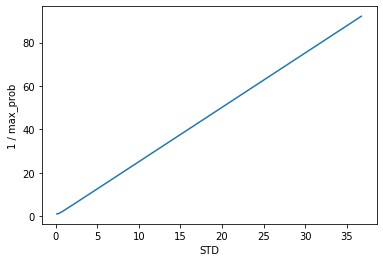

In [20]:
plt.xlabel("STD")
plt.ylabel("1 / max_prob")
plt.plot(std_array, 1 / max_values)
plt.show()

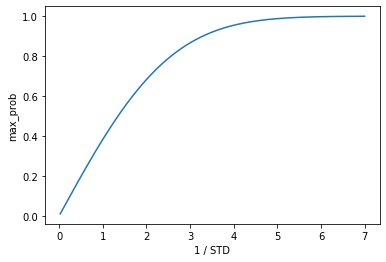

In [21]:
plt.xlabel("1 / STD")
plt.ylabel("max_prob")
plt.plot((1 / std_array), max_values)
plt.show()

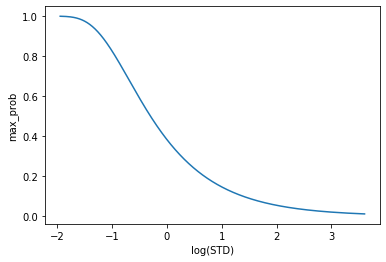

In [22]:
plt.xlabel("log(STD)")
plt.ylabel("max_prob")
plt.plot(np.log(std_array), max_values)
plt.show()

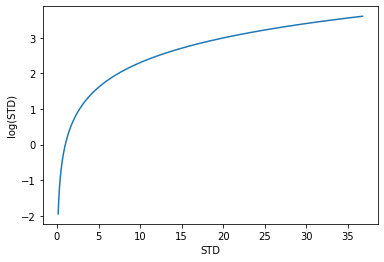

In [25]:
plt.xlabel("STD")
plt.ylabel("log(STD)")
plt.plot(std_array, np.log(std_array))
plt.show()

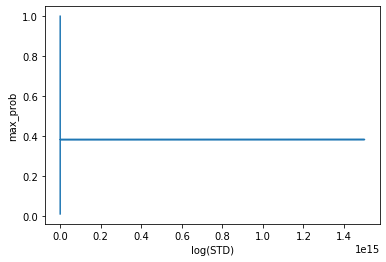

In [24]:
plt.xlabel("log(STD)")
plt.ylabel("max_prob")
plt.plot(1 / np.log(std_array), max_values)
plt.show()